## Gaussian Naive Bayes

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
htru2 = fetch_ucirepo(id=372) 
  
# data (as pandas dataframes) 
X = htru2.data.features 
y = htru2.data.targets 
  



In [2]:
X

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306
...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910


In [3]:
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
17893,0
17894,0
17895,0
17896,0


In [4]:
y.value_counts()

class
0        16259
1         1639
Name: count, dtype: int64

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score


### Data Transformation

In [6]:
df = pd.concat([X,y], axis = 1)
df

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [7]:
# Standard Scaling

columns_to_scale = df.columns[:-1]

standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[columns_to_scale] = standard_scaler.fit_transform(df[columns_to_scale])

# For Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[columns_to_scale] = minmax_scaler.fit_transform(df[columns_to_scale])


## Data Splitting

In [8]:
X_standard = df_standard_scaled.drop(columns={'class'})
y_standard = df_standard_scaled['class']

X_minmax = df_minmax_scaled.drop(columns={'class'})
y_minmax = df_minmax_scaled['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X_standard, y_standard, test_size=0.3, random_state=0)

X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y_minmax, test_size=0.3, random_state=0)


In [9]:
# Unscaled dataset
nb_unscaled = GaussianNB()
nb_unscaled.fit(X_train, y_train)
y_pred_unscaled = nb_unscaled.predict(X_test)

print(f'accuracy score is {accuracy_score(y_test, y_pred_unscaled)}')
print(f'precision score is {precision_score(y_test, y_pred_unscaled, pos_label = 1)}')
print(f'recall score is {recall_score(y_test, y_pred_unscaled, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test, y_pred_unscaled, pos_label = 1)}')


accuracy score is 0.948975791433892
precision score is 0.6450511945392492
recall score is 0.8513513513513513
f1 score is 0.7339805825242719


C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4926
           1       0.65      0.85      0.73       444

    accuracy                           0.95      5370
   macro avg       0.82      0.90      0.85      5370
weighted avg       0.96      0.95      0.95      5370



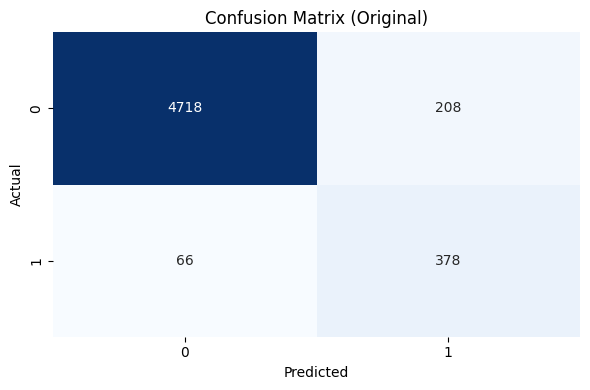

In [10]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred_unscaled))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_unscaled)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix (Original)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [11]:
# Min-max scaled dataset
nb_minmax = GaussianNB()
nb_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_minmax = nb_minmax.predict(X_test_minmax)

print(f'accuracy score is {accuracy_score(y_test_minmax, y_pred_minmax)}')
print(f'precision score is {precision_score(y_test_minmax, y_pred_minmax, pos_label = 1)}')
print(f'recall score is {recall_score(y_test_minmax, y_pred_minmax, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test_minmax, y_pred_minmax, pos_label = 1)}')

accuracy score is 0.948975791433892
precision score is 0.6450511945392492
recall score is 0.8513513513513513
f1 score is 0.7339805825242719



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4926
           1       0.65      0.85      0.73       444

    accuracy                           0.95      5370
   macro avg       0.82      0.90      0.85      5370
weighted avg       0.96      0.95      0.95      5370



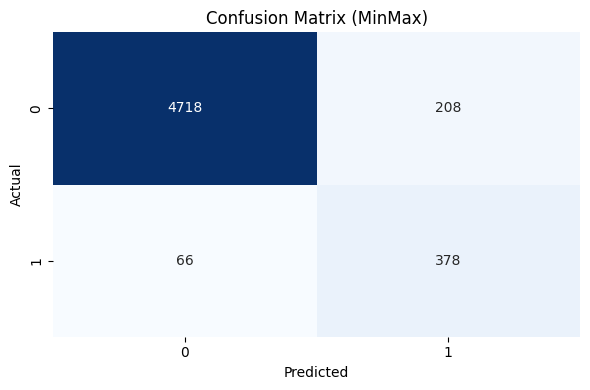

In [12]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test_minmax, y_pred_minmax))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_minmax, y_pred_minmax)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix (MinMax)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [13]:
# Standard scaled dataset
nb_standard = GaussianNB()
nb_standard.fit(X_train_standard, y_train_standard)
y_pred_standard = nb_standard.predict(X_test_standard)

print(f'accuracy score is {accuracy_score(y_test_standard, y_pred_standard)}')
print(f'precision score is {precision_score(y_test_standard, y_pred_standard, pos_label = 1)}')
print(f'recall score is {recall_score(y_test_standard, y_pred_standard, pos_label = 1)}')
print(f'f1 score is {f1_score(y_test_standard, y_pred_standard, pos_label = 1)}')

accuracy score is 0.948975791433892
precision score is 0.6450511945392492
recall score is 0.8513513513513513
f1 score is 0.7339805825242719



 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      4926
           1       0.65      0.85      0.73       444

    accuracy                           0.95      5370
   macro avg       0.82      0.90      0.85      5370
weighted avg       0.96      0.95      0.95      5370



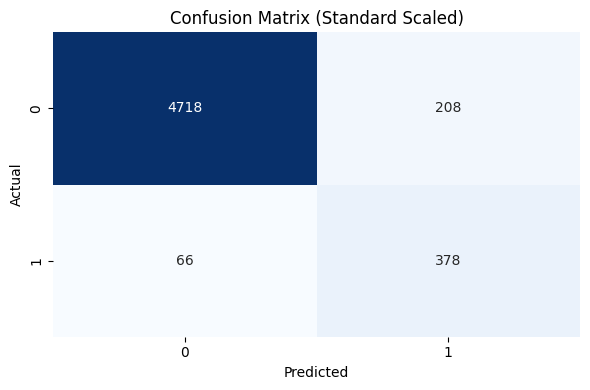

In [14]:
# Classification report
print("\n Classification Report:")
print(classification_report(y_test_standard, y_pred_standard))

# Confusion matrix
conf_matrix = confusion_matrix(y_test_standard, y_pred_standard)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix (Standard Scaled)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()